In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
import json

def load_backtest_json(filename):
    with open(filename, "r") as f:
        data = json.load(f)
    for key in ["long_entries", "short_entries", "exits"]:
        data[key] = [tuple(x) for x in data[key] if x is not None]

    return data

testing_set = pd.read_csv("testing_indicators5_log.csv")
ATR = testing_set["ATR%"]
data = pd.read_csv("testing_data.csv")
df = data.copy()
price_plt = df.iloc[::5, :].reset_index(drop=True)

In [15]:
LR_backtest  = load_backtest_json("LR_backtest.json")
SVR_backtest = load_backtest_json("SVR_backtest.json")
XGB_backtest = load_backtest_json("XGB_backtest.json")
DT_backtest  = load_backtest_json("DT_backtest.json")
RF_backtest  = load_backtest_json("RF_backtest.json")

In [43]:
LR_backtest_ridge = load_backtest_json("LR_backtest_ridge.json")
SVR_backtest_ridge = load_backtest_json("SVR_backtest_ridge.json")
XGB_backtest_ridge = load_backtest_json("XGB_backtest_ridge.json")
DT_backtest_ridge  = load_backtest_json("DT_backtest_ridge.json")
RF_backtest_ridge  = load_backtest_json("RF_backtest_ridge.json")

In [16]:
import yfinance as yf

ticker = "^TNX"
data = yf.download(ticker, period="1y")

risk_free_rate = data['Close'].iloc[-1] / 100
risk_free_rate = risk_free_rate["^TNX"]/121

/tmp/ipython-input-3789647642.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


In [73]:
def Sharp(total_ret):
    ret = np.mean(total_ret)
    vol = np.std(total_ret)

    N = len(total_ret)
    if N == 0 or vol == 0:
        return np.nan

    T_years = (len(data) * 5) / (60 * 24 * 365)

    # 年化
    ret_annual = (1 + ret)**(1/T_years) - 1
    vol_annual = vol * (1 / np.sqrt(T_years))

    return float((ret_annual - risk_free_rate) / vol_annual)

In [74]:
def MaxDrawdown(total_ret):
    if len(total_ret) == 0:
        return np.nan
    equity = np.cumprod(1 + np.array(total_ret))
    peak = np.maximum.accumulate(equity)
    drawdown = (peak - equity) / peak
    return drawdown.max()

In [75]:
def CAGR(total_ret):
    if len(total_ret) == 0:
        return np.nan

    equity = np.cumprod(1 + np.array(total_ret))

    T_years = (len(data) * 5) / (60 * 24 * 365)

    if T_years <= 0:
        return np.nan

    return (equity[-1]) ** (1 / T_years) - 1

In [76]:
sharpe_LR = Sharp(LR_backtest["total_ret"])
sharpe_SVR = Sharp(SVR_backtest["total_ret"])
sharpe_XGB = Sharp(XGB_backtest["total_ret"])
sharpe_DT = Sharp(DT_backtest["total_ret"])
sharpe_RF = Sharp(RF_backtest["total_ret"])

In [77]:
sharpe_LR_ridge = Sharp(LR_backtest_ridge["total_ret"])
sharpe_SVR_ridge = Sharp(SVR_backtest_ridge["total_ret"])
sharpe_XGB_ridge = Sharp(XGB_backtest_ridge["total_ret"])
sharpe_DT_ridge = Sharp(DT_backtest_ridge["total_ret"])
sharpe_RF_ridge = Sharp(RF_backtest_ridge["total_ret"])

In [78]:
maxd_LR = MaxDrawdown(LR_backtest["total_ret"])
maxd_SVR = MaxDrawdown(SVR_backtest["total_ret"])
maxd_XGB = MaxDrawdown(XGB_backtest["total_ret"])
maxd_DT = MaxDrawdown(DT_backtest["total_ret"])
maxd_RF = MaxDrawdown(RF_backtest["total_ret"])

In [79]:
maxd_LR_ridge = MaxDrawdown(LR_backtest_ridge["total_ret"])
maxd_SVR_ridge = MaxDrawdown(SVR_backtest_ridge["total_ret"])
maxd_XGB_ridge = MaxDrawdown(XGB_backtest_ridge["total_ret"])
maxd_DT_ridge = MaxDrawdown(DT_backtest_ridge["total_ret"])
maxd_RF_ridge = MaxDrawdown(RF_backtest_ridge["total_ret"])

In [80]:
cagr_LR  = CAGR(LR_backtest["total_ret"])
cagr_SVR = CAGR(SVR_backtest["total_ret"])
cagr_XGB = CAGR(XGB_backtest["total_ret"])
cagr_DT  = CAGR(DT_backtest["total_ret"])
cagr_RF  = CAGR(RF_backtest["total_ret"])

In [81]:
cagr_LR_ridge = CAGR(LR_backtest_ridge["total_ret"])
cagr_SVR_ridge = CAGR(SVR_backtest_ridge["total_ret"])
cagr_XGB_ridge = CAGR(XGB_backtest_ridge["total_ret"])
cagr_DT_ridge  = CAGR(DT_backtest_ridge["total_ret"])
cagr_RF_ridge  = CAGR(RF_backtest_ridge["total_ret"])

In [65]:
def visualize(long_entries, short_entries, exits):
  plt.figure(figsize=(14,7))
  plt.plot(price_plt["close"], label="Price", color="blue")

  plt.scatter([x[0] for x in long_entries], [x[1] for x in long_entries],
              color="green", marker="^", s=80, label="Long Entry")

  plt.scatter([x[0] for x in short_entries], [x[1] for x in short_entries],
              color="red", marker="v", s=80, label="Short Entry")

  plt.scatter([x[0] for x in exits], [x[1] for x in exits],
              color="black", marker="x", s=80, label="Exit")

  plt.legend()
  plt.title("Trading Strategy Simulation")
  plt.xlabel("Index")
  plt.ylabel("Price")
  plt.show()

Plotting LR trading strategy


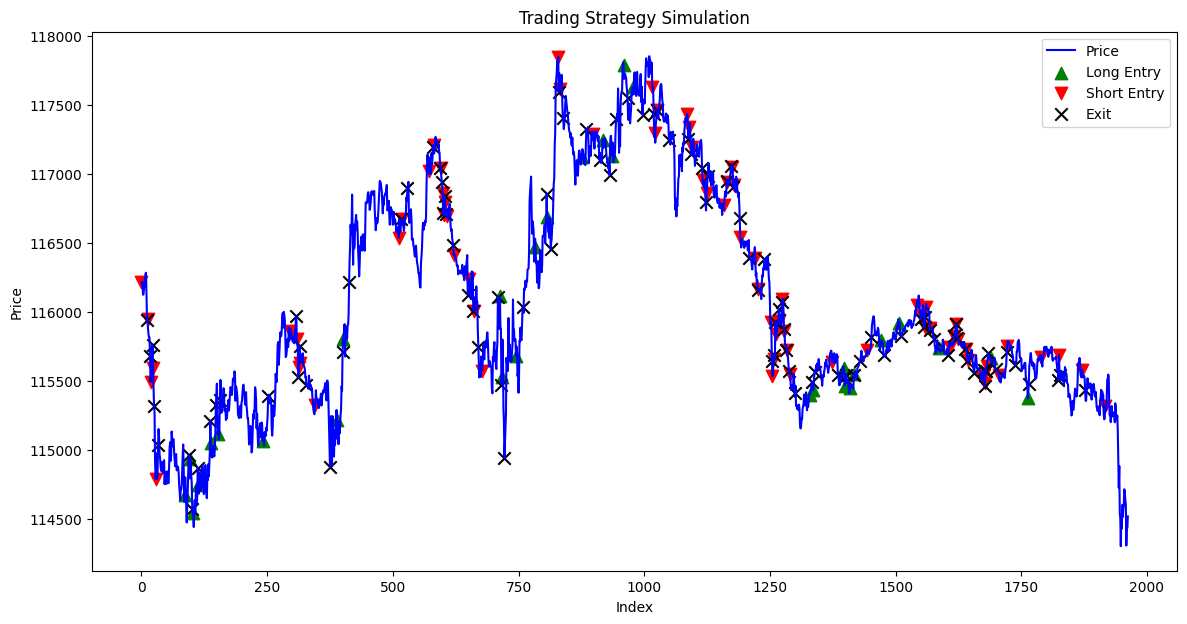

Sharpe ratio:  2.826605082306839
Max Drawdown:  0.01509657011843533
Plotting SVR trading strategy


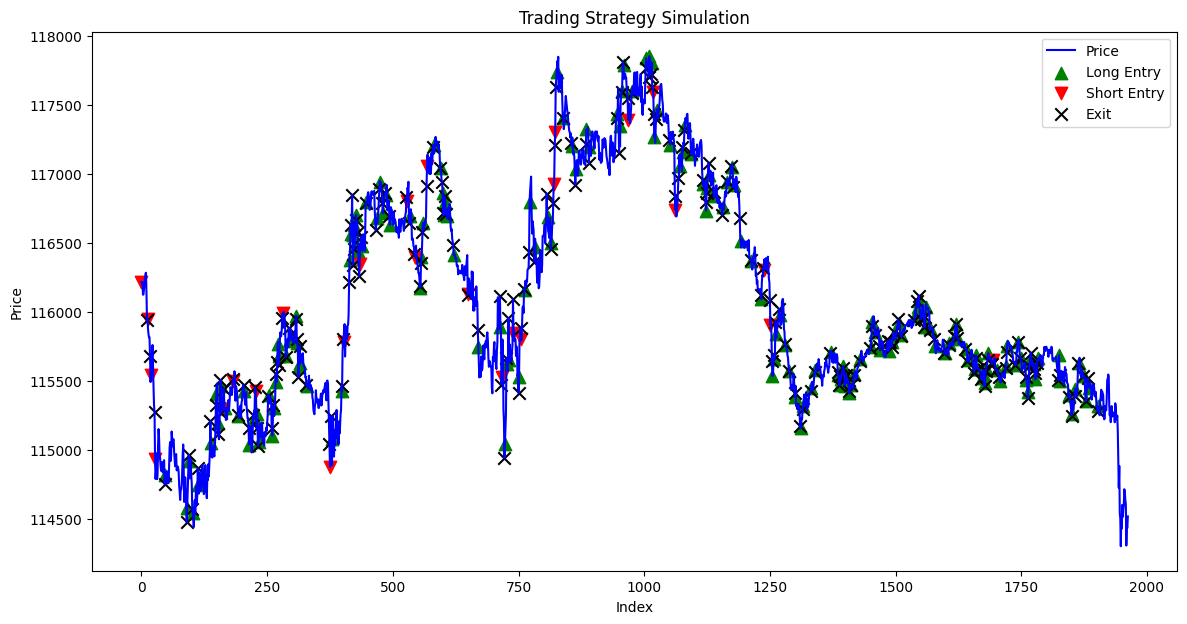

Sharpe ratio:  0.8136521934147627
Max Drawdown:  0.02600079009213043
Plotting XGB trading strategy


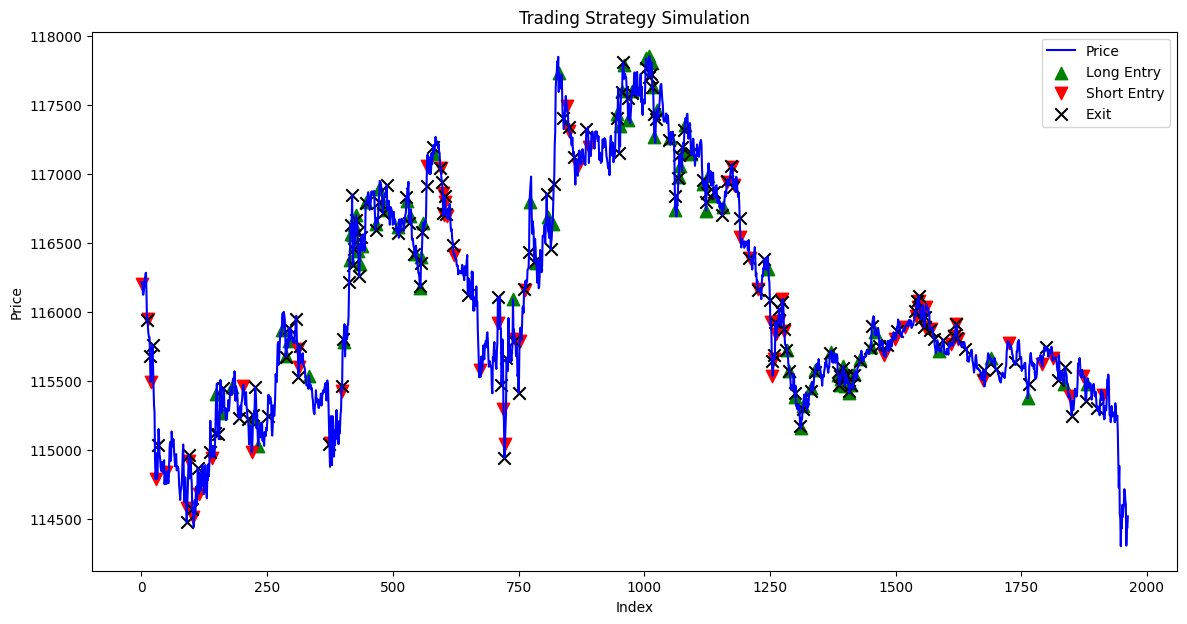

Sharpe ratio:  -0.4424826249948115
Max Drawdown:  0.025581692868553097
Plotting DT trading strategy


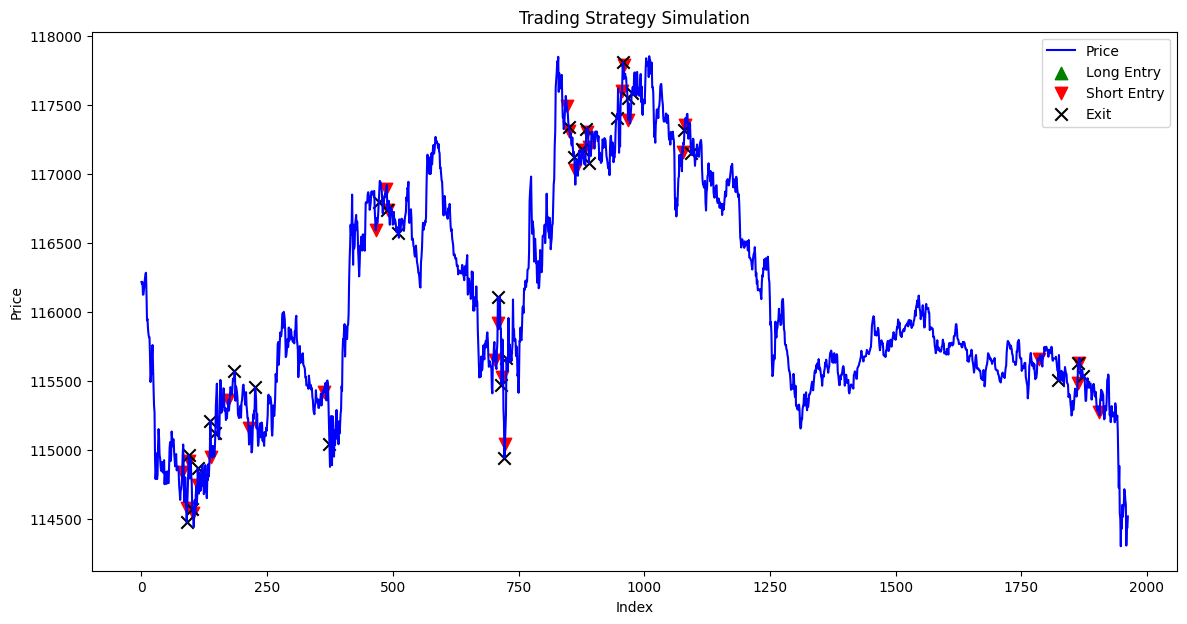

Sharpe ratio:  -0.8168880496650516
Max Drawdown:  0.013055574758922923
Plotting RF trading strategy


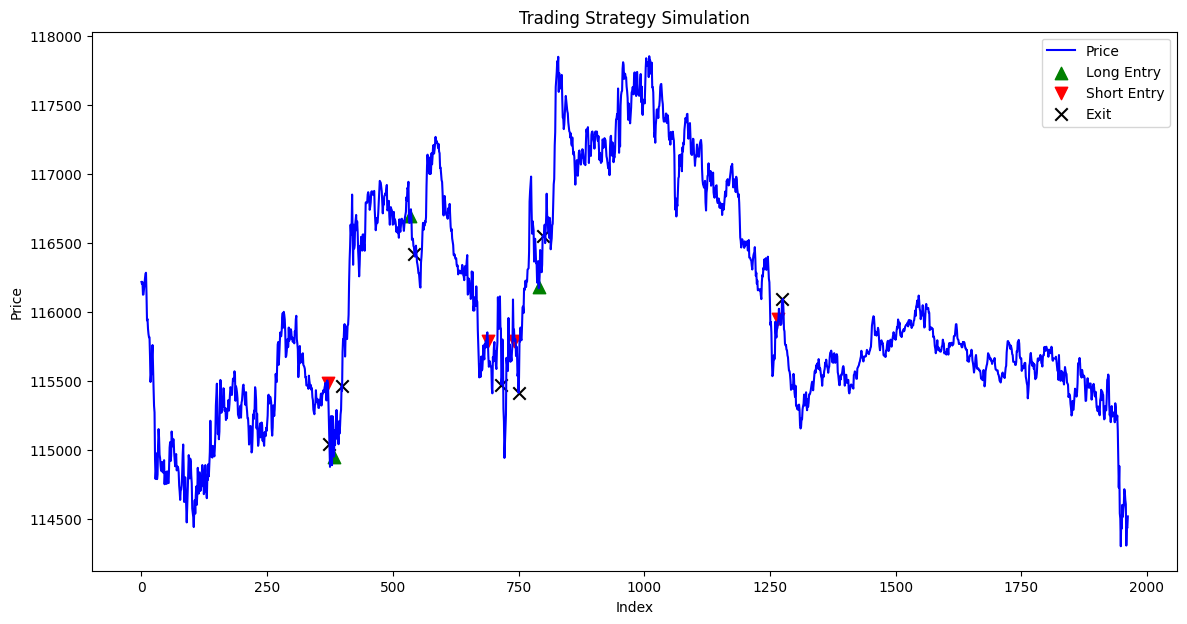

Sharpe ratio:  9.985606293965656
Max Drawdown:  0.002377464339140924


In [24]:
backtests = {
    "LR": [LR_backtest, sharpe_LR, maxd_LR],
    "SVR": [SVR_backtest, sharpe_SVR, maxd_SVR],
    "XGB": [XGB_backtest, sharpe_XGB, maxd_XGB],
    "DT": [DT_backtest, sharpe_DT, maxd_DT],
    "RF": [RF_backtest, sharpe_RF, maxd_RF],
}

for name, bt in backtests.items():
    long_entries  = bt[0]["long_entries"]
    short_entries = bt[0]["short_entries"]
    exits = bt[0]["exits"]
    print(f"Plotting {name} trading strategy")
    visualize(long_entries, short_entries, exits)
    print("Sharpe ratio: ", bt[1])
    print("Max Drawdown: ", bt[2])

Plotting LR_ridge trading strategy


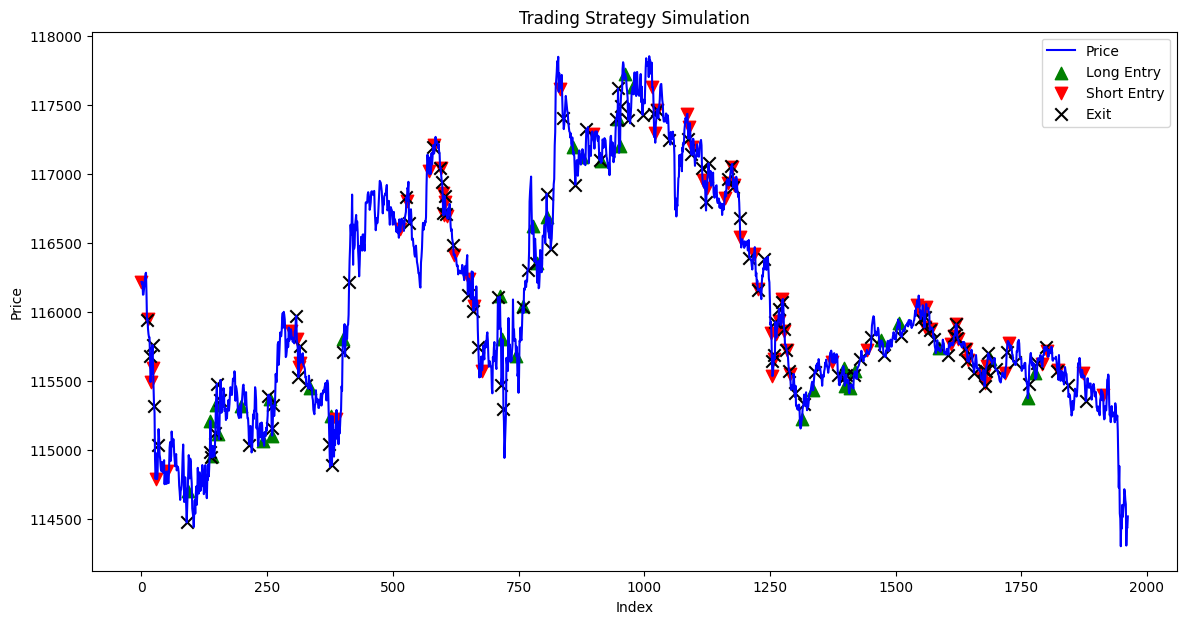

Sharpe ratio:  1.596423506222316
Max Drawdown:  0.014390289451433988
Plotting SVR_ridge trading strategy


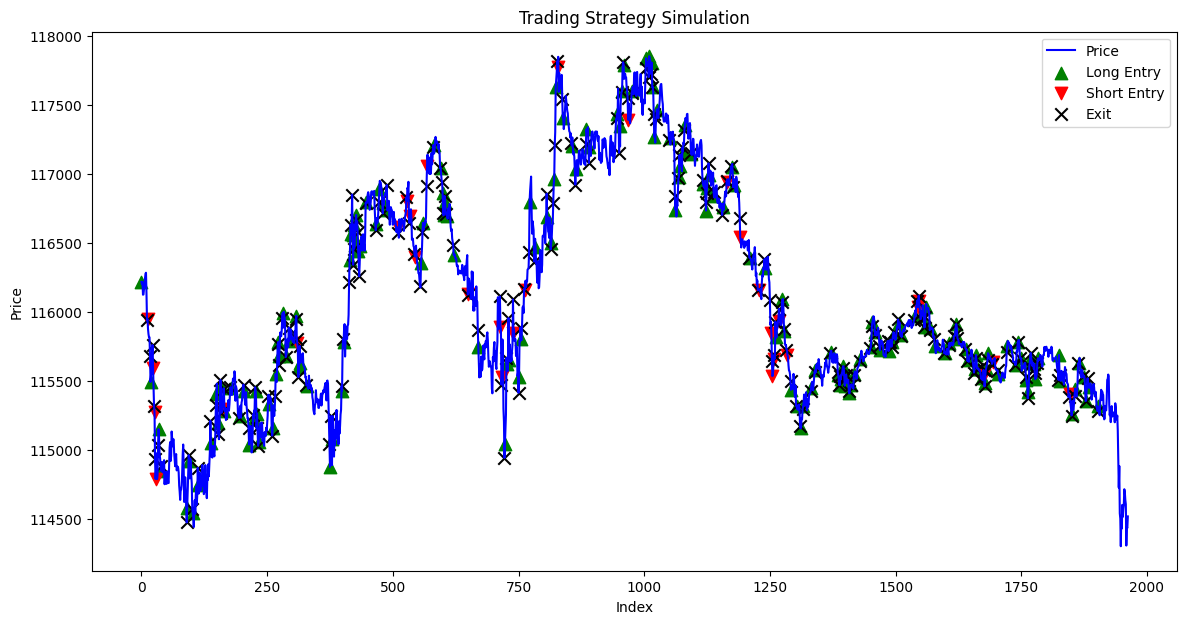

Sharpe ratio:  1.203316047982146
Max Drawdown:  0.023613212651194728
Plotting XGB_ridge trading strategy


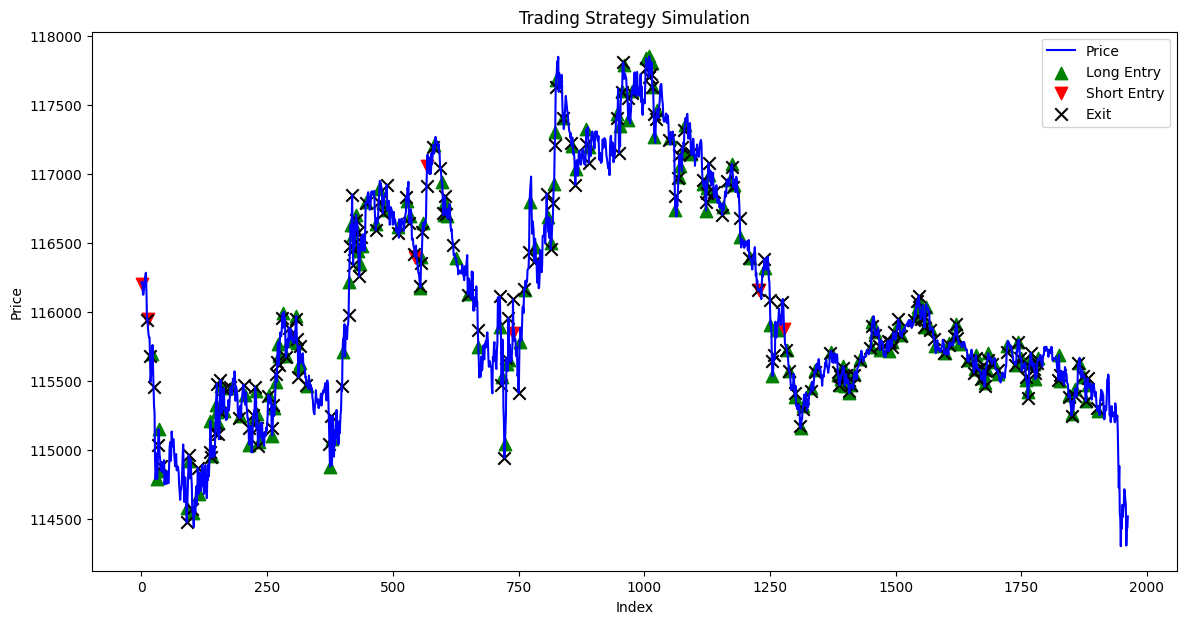

Sharpe ratio:  0.2849061894849231
Max Drawdown:  0.02263894405774332
Plotting DT_ridge trading strategy


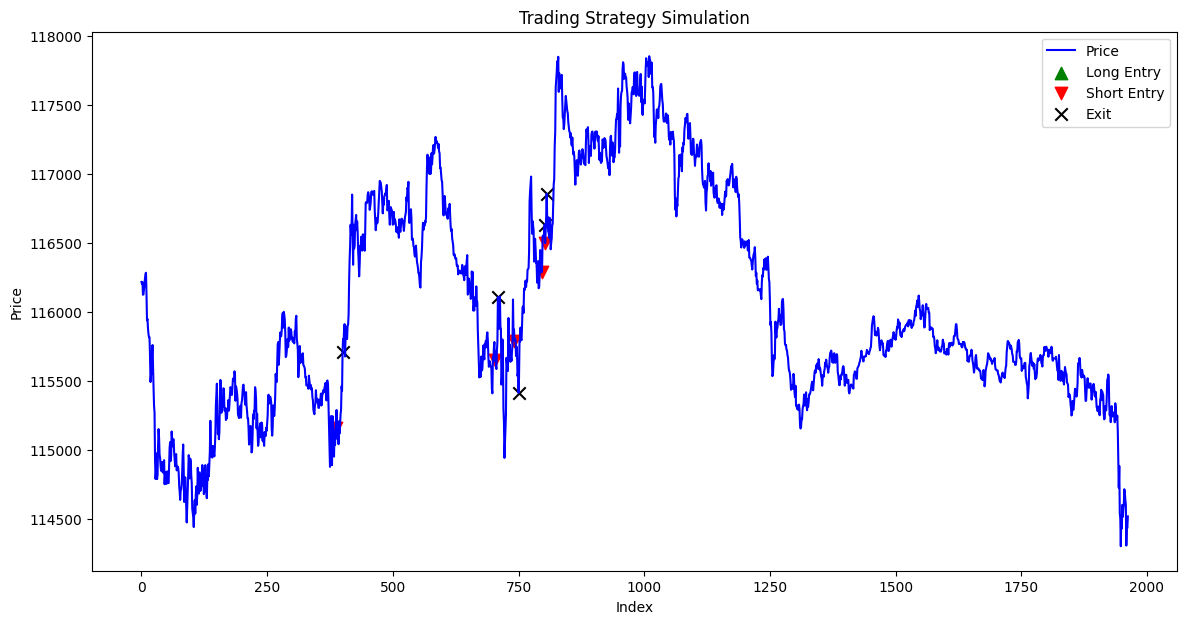

Sharpe ratio:  -7.7839712234656435
Max Drawdown:  0.006756886423192732
Plotting RF_ridge trading strategy


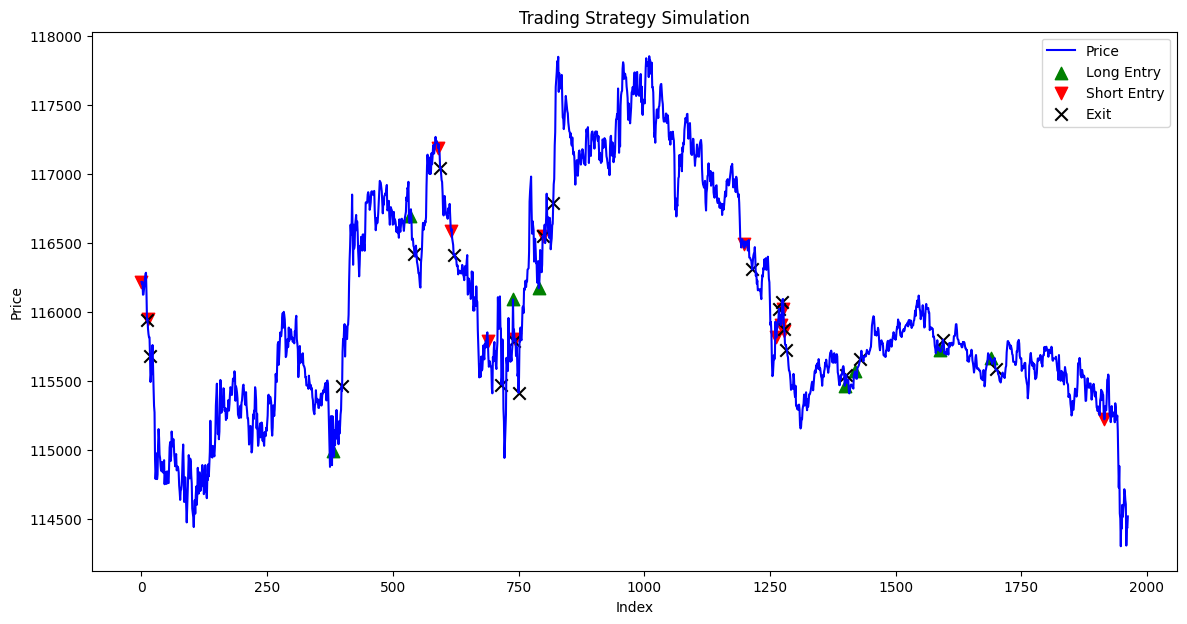

Sharpe ratio:  4.68347765993332
Max Drawdown:  0.0037396194217358485


In [47]:
backtests_ridge = {
    "LR_ridge": [LR_backtest_ridge, sharpe_LR_ridge, maxd_LR_ridge],
    "SVR_ridge": [SVR_backtest_ridge, sharpe_SVR_ridge, maxd_SVR_ridge],
    "XGB_ridge": [XGB_backtest_ridge, sharpe_XGB_ridge, maxd_XGB_ridge],
    "DT_ridge": [DT_backtest_ridge, sharpe_DT_ridge, maxd_DT_ridge],
    "RF_ridge": [RF_backtest_ridge, sharpe_RF_ridge, maxd_RF_ridge],
}

for name, bt in backtests_ridge.items():
    long_entries  = bt[0]["long_entries"]
    short_entries = bt[0]["short_entries"]
    exits = bt[0]["exits"]
    print(f"Plotting {name} trading strategy")
    visualize(long_entries, short_entries, exits)
    print("Sharpe ratio: ", bt[1])
    print("Max Drawdown: ", bt[2])

In [48]:
# 勝率 = 賺錢的交易數量 / (賺錢的交易數量 + 虧錢的交易數量)
def trade_winrate(total_ret):
    wins = sum(r > 0 for r in total_ret)
    loss = sum(r < 0 for r in total_ret)
    if wins + loss == 0:
        return np.nan
    return wins / (wins + loss)

In [49]:
winrates = {
    "LR": trade_winrate(LR_backtest["total_ret"]),
    "SVR": trade_winrate(SVR_backtest["total_ret"]),
    "XGB": trade_winrate(XGB_backtest["total_ret"]),
    "DT": trade_winrate(DT_backtest["total_ret"]),
    "RF": trade_winrate(RF_backtest["total_ret"]),
}

winrates

{'LR': 0.6274509803921569,
 'SVR': 0.5196078431372549,
 'XGB': 0.5032258064516129,
 'DT': 0.4666666666666667,
 'RF': 0.7142857142857143}

In [50]:
winrates = {
    "LR_ridge": trade_winrate(LR_backtest_ridge["total_ret"]),
    "SVR_ridge": trade_winrate(SVR_backtest_ridge["total_ret"]),
    "XGB_ridge": trade_winrate(XGB_backtest_ridge["total_ret"]),
    "DT_ridge": trade_winrate(DT_backtest_ridge["total_ret"]),
    "RF_ridge": trade_winrate(RF_backtest_ridge["total_ret"]),
}

winrates

{'LR_ridge': 0.6036036036036037,
 'SVR_ridge': 0.5219512195121951,
 'XGB_ridge': 0.5074626865671642,
 'DT_ridge': 0.2,
 'RF_ridge': 0.7}

In [51]:
# Expected values, ev = p(win)*u(win)+p(loss)*u(loss)
def trade_ev(total_ret):
    total_ret = np.array(total_ret)
    wins = total_ret[total_ret > 0]
    loss = total_ret[total_ret < 0]

    if len(wins) + len(loss) == 0:
        return np.nan, np.nan, np.nan, np.nan, np.nan

    p_win = len(wins) / (len(wins) + len(loss))
    p_loss = 1 - p_win

    avg_win = wins.mean() if len(wins) > 0 else 0.0
    avg_loss = -loss.mean() if len(loss) > 0 else 0.0

    EV = p_win * avg_win - p_loss * avg_loss

    return EV, p_win, avg_win, p_loss, avg_loss

In [84]:
ev_stats = {}

for name, bt in {
    "LR": LR_backtest,
    "SVR": SVR_backtest,
    "XGB": XGB_backtest,
    "DT": DT_backtest,
    "RF": RF_backtest,
    "LR_ridge": LR_backtest_ridge,
    "SVR_ridge": SVR_backtest_ridge,
    "XGB_ridge": XGB_backtest_ridge,
    "DT_ridge": DT_backtest_ridge,
    "RF_ridge": RF_backtest_ridge,
}.items():
    EV, p_win, avg_win, p_loss, avg_loss = trade_ev(bt["total_ret"])
    ev_stats[name] = {
        "EV_per_trade": EV,
        "win_rate": p_win,
        "avg_win": avg_win,
        "loss_rate": p_loss,
        "avg_loss": avg_loss,
    }

ev_df = pd.DataFrame(ev_stats).T
print(ev_df)

           EV_per_trade  win_rate   avg_win  loss_rate  avg_loss
LR             0.000478  0.627451  0.001727   0.372549  0.001625
SVR            0.000140  0.519608  0.001727   0.480392  0.001576
XGB           -0.000075  0.503226  0.001624   0.496774  0.001797
DT            -0.000192  0.466667  0.002279   0.533333  0.002355
RF             0.001982  0.714286  0.003494   0.285714  0.001800
LR_ridge       0.000277  0.603604  0.001626   0.396396  0.001778
SVR_ridge      0.000206  0.521951  0.001791   0.478049  0.001525
XGB_ridge      0.000050  0.507463  0.001659   0.492537  0.001607
DT_ridge      -0.002309  0.200000  0.003243   0.800000  0.003697
RF_ridge       0.000801  0.700000  0.001929   0.300000  0.001830


In [82]:
performance_table = pd.DataFrame({
    "Model": ["LR", "SVR", "XGB", "DT", "RF", "LR_ridge", "SVR_ridge", "XGB_ridge", "DT_ridge", "RF_ridge"],
    "Sharpe Ratio": [sharpe_LR, sharpe_SVR, sharpe_XGB, sharpe_DT, sharpe_RF,
              sharpe_LR_ridge, sharpe_SVR_ridge, sharpe_XGB_ridge, sharpe_DT_ridge, sharpe_RF_ridge],
    "Max Drawdown": [maxd_LR, maxd_SVR, maxd_XGB, maxd_DT, maxd_RF,
              maxd_LR_ridge, maxd_SVR_ridge, maxd_XGB_ridge, maxd_DT_ridge, maxd_RF_ridge],
    "CAGR": [cagr_LR, cagr_SVR, cagr_XGB, cagr_DT, cagr_RF,
             cagr_LR_ridge, cagr_SVR_ridge, cagr_XGB_ridge, cagr_DT_ridge, cagr_RF_ridge]
})

print(performance_table)

       Model  Sharpe Ratio  Max Drawdown      CAGR
0         LR      0.770657      0.015097  0.682920
1        SVR      0.191218      0.026001  0.354126
2        XGB     -0.179774      0.025582 -0.120420
3         DT     -0.281039      0.013056 -0.060989
4         RF      2.619920      0.002377  0.159795
5   LR_ridge      0.419810      0.014390  0.386477
6  SVR_ridge      0.304989      0.023613  0.565024
7  XGB_ridge      0.034601      0.022639  0.110355
8   DT_ridge     -2.654390      0.006757 -0.116653
9   RF_ridge      1.285950      0.003740  0.186688
